In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('clean_data/weather_flu_google_9.csv',na_values='NA')
df['cases']=df['total.specimens']*df['percent.positive']*.0001



In [2]:
#df[['tamiflu','flu_symptoms','flu','influenza','absolute_humidity','median_t','week']]
train_df = df[(df.year < 2017)|((df.year == 2017)&(df.week < 40))]
test_df = df[((df.year > 2017)& (df.week <40))|((df.year == 2017)&(df.week >= 40))]

In [3]:
X_train = train_df[['tamiflu','flu_symptoms','influenza','flu','median_t','week','absolute_humidity']]
X_test = test_df[['tamiflu','flu_symptoms','influenza','flu','median_t','week','absolute_humidity']]
y_train = train_df['cases']
y_test = test_df['cases']
#for col in X_train.columns:
    #X_train[col] = (X_train[col]-X_train[col].mean())/X_train[col].std()
    #X_test[col] = (X_test[col]-X_test[col].mean())/X_test[col].std()

In [7]:
from sklearn import tree
from sklearn import linear_model
from sklearn import metrics
import math
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
y_pred = [max(0,x) for x in y_pred]
math.sqrt(metrics.mean_squared_error(y_test,y_pred))

0.18422273566517047

In [507]:
metrics.r2_score(y_test,y_pred)

0.9826759349651543

In [508]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
X_train_transform = poly.fit_transform(X_train)
X_test_transform = poly.fit_transform(X_test)
reg = linear_model.LinearRegression()
reg.fit(X_train_transform,y_train)
y_pred_poly = reg.predict(X_test_transform)
y_pred_poly = [max(0,x) for x in y_pred_poly]
math.sqrt(metrics.mean_squared_error(y_test,y_pred_poly))

1.354266751885123

In [509]:
metrics.r2_score(y_test,y_pred_poly)

0.06379321601034771

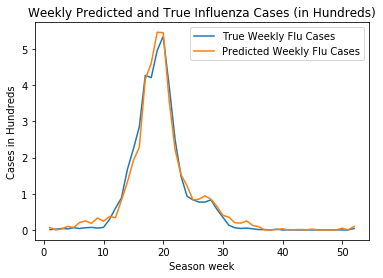

In [534]:
import matplotlib.pyplot as plt
year_num = pd.to_numeric(test_df['year'])+test_df['week']/52
plt.title("Weekly Predicted and True Influenza Cases (in Hundreds)")
plt.xlabel("Season week")
plt.ylabel("Cases in Hundreds")
plt.plot([x for x in range(1,53)],y_test,label="True Weekly Flu Cases")
plt.plot([x for x in range(1,53)],y_pred,label="Predicted Weekly Flu Cases")
plt.legend()

Text(0, 0.5, 'Cases (hundreds)')

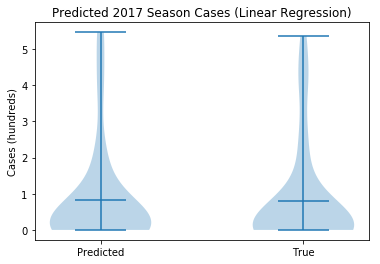

In [511]:
plt.violinplot([y_pred,y_test],showmeans=True)
labels = ["Predicted","True"]
plt.xticks([1,2],labels)
plt.title("Predicted 2017 Season Cases (Linear Regression)")
plt.ylabel("Cases (hundreds)")

In [512]:
clf = tree.DecisionTreeRegressor(max_depth=4)
clf.fit(X_train,y_train)
y_pred_tree = clf.predict(X_test)
y_pred_tree = [max(0,x) for x in y_pred_tree]
math.sqrt(metrics.mean_squared_error(y_test,y_pred_tree))

0.9655372927968588

In [513]:
metrics.r2_score(y_test,y_pred_tree)

0.524115613375712

In [514]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100,max_depth=10)
rfr.fit(X_train,y_train)
y_pred_forest = rfr.predict(X_test)
y_pred_forest = [max(0,x) for x in y_pred_forest]
math.sqrt(metrics.mean_squared_error(y_test,y_pred_forest))

0.8507660285952198

In [515]:
metrics.r2_score(y_test,y_pred_forest)

0.6305262137612988

In [532]:
y_pred_base = df.groupby('week').mean()['cases']
y_pred_base = y_pred_base[0:52]
y_pred_base = y_pred_base[39:52].append(y_pred_base[0:39])
metrics.r2_score(y_test,y_pred_base)

0.45087855451807224

In [9]:
np.save('linreg_pred', y_pred)